# Dilate Images

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
import tensorflow as tf
import galflow as gf
from tensorflow_addons import image as tfa_image

In [3]:
import tensorflow_datasets as tfds 
batch_size=1
data= tfds.load('GalGen/small_stamp_100k')
data = data['train'].cache()
data = data.repeat()
data = data.shuffle(1000)
data = data.batch(batch_size)
data = data.prefetch(tf.data.experimental.AUTOTUNE)

In [4]:
data1 = data.take(1)
data1 = data1.as_numpy_iterator()
data1 = data1.next()
psf1  = data1['psf_image'][0]

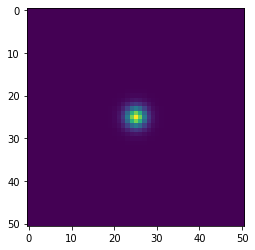

In [5]:
imshow(psf1)

In [6]:
gf.dilate?

Signature: gf.dilate(img, factor, interpolator='bernsteinquintic')
Docstring:
Dilate images by some factor, preserving the center. 

Args:
  img: tf tensor containing [batch_size, nx, ny, channels] images
  factor: dilation factor 

Returns:
  dilated: tf tensor containing [batch_size, nx, ny, channels] images dilated by factor around the centre
File:      ~/github/galflow/galflow/python/transform.py
Type:      function


tf.Tensor(0.017699424, shape=(), dtype=float32)


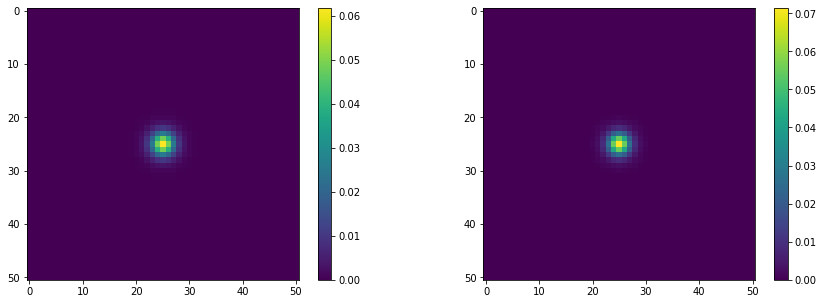

In [7]:
import galflow as gf
import galsim as gs
factor = 1+(.01)**2
dilpsf1 = gf.dilate(psf1.reshape(1,51,51,1),factor)[0,...,0]

psf1gsimg=gs.Image(psf1)
psf1gs = gs.InterpolatedImage(psf1gsimg,scale=.263)
psf1gsdilate = psf1gs.dilate(factor)
galsimdilateteste=psf1gsdilate.drawImage(nx=51,ny=51).array

figure(figsize=(15,5))
subplot(121)
imshow(dilpsf1);colorbar()
subplot(122)
imshow(galsimdilateteste);colorbar()
print(tf.norm(dilpsf1-galsimdilateteste,ord=2))

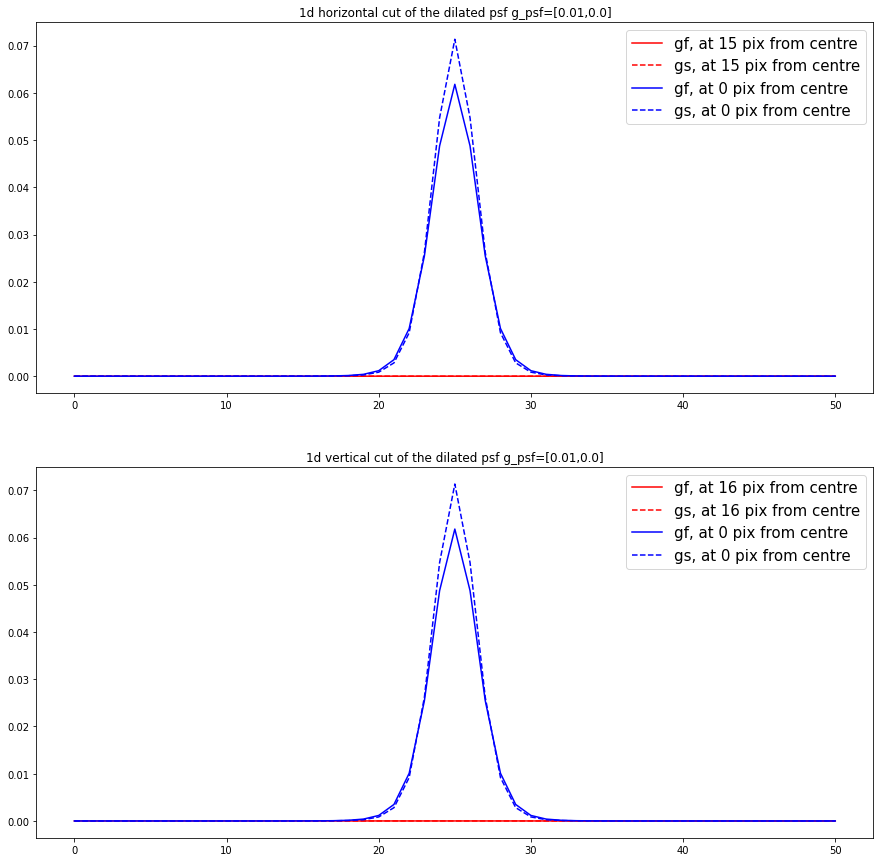

In [8]:
figure(figsize=(15,15))
subplot(211)
plot(dilpsf1[:,10],'-',label='gf, at 15 pix from centre',color='red')
plot(galsimdilateteste[:,10],'--',label='gs, at 15 pix from centre',color='red')
plot(dilpsf1[:,25],'-',label='gf, at 0 pix from centre',color='blue')
plot(galsimdilateteste[:,25],'--',label='gs, at 0 pix from centre',color='blue')
#yscale('log')
legend(fontsize=15)
title('1d horizontal cut of the dilated psf g_psf=[0.01,0.0]')

subplot(212)
plot(dilpsf1[9,:],'-',label='gf, at 16 pix from centre',color='red')
plot(galsimdilateteste[9,:],'--',label='gs, at 16 pix from centre',color='red')
plot(dilpsf1[25,:],'-',label='gf, at 0 pix from centre',color='blue')
plot(galsimdilateteste[25,:],'--',label='gs, at 0 pix from centre',color='blue')
#yscale('log')
legend(fontsize=15)
title('1d vertical cut of the dilated psf g_psf=[0.01,0.0]')

savefig('dilate_test.jpg',bbox_inches='tight')

In [12]:
teste=gs.Pixel(scale=1)

In [13]:
teste

galsim.Pixel(scale=1.0, flux=1.0, gsparams=galsim.GSParams(128,8192,0.005,5.0,0.001,1e-05,1e-05,1,0.0001,1e-06,1e-06,1e-08,1e-05))

In [17]:
teste.drawImage(nx=51,ny=51).array=teste.drawImage(nx=51,ny=51).array

In [20]:
pixim[25,25]

2.4674011e-06

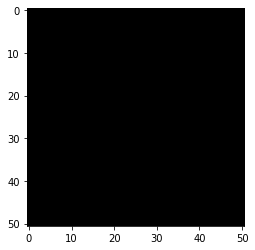

In [18]:
imshow(pixim,cmap='gist_stern')